In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
data = pd.read_csv('googleplaystore.csv', skipinitialspace=True)
df = data.copy()
df = df.drop(df.index[500:,])
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.shape

(500, 13)

In [4]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [5]:
df.describe()

,Rating
count,485.000000
mean,4.275670
std,0.317444
min,2.600000
25%,4.100000
50%,4.300000
75%,4.500000
max,5.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 13 columns):
App               500 non-null object
Category          500 non-null object
Rating            485 non-null float64
Reviews           500 non-null object
Size              500 non-null object
Installs          500 non-null object
Type              500 non-null object
Price             500 non-null object
Content Rating    500 non-null object
Genres            500 non-null object
Last Updated      500 non-null object
Current Ver       499 non-null object
Android Ver       500 non-null object
dtypes: float64(1), object(12)
memory usage: 54.7+ KB


In [7]:
df.isnull().head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False


**Splitting:**
deletes "Varies with device" text from Size column and replace 'M' with ' ' string, e.g '123M' becomes 123 and also drops NaN value. Some data in Size column also contains data like '234K', '765k' which means 'Kb' Kilobytes so this function removes 'k' and than divide this value with 1000 in order to convert it into Mb


In [8]:
df[df.Size == 'Varies with device'] = 0
sub_df = pd.Series(df.Size.copy())
sub_df = sub_df.str.replace('M', '').dropna()

def remv(x):
    if 'k' in x:
        x = x.replace('k', '')
        temp = float(x)/1000
        return temp
    else:
        return x
    
sub_df = sub_df.apply(remv)
df['Size in MB'] = sub_df
df['Size in MB'] = df['Size in MB'].fillna(0)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size in MB
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,5.6
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up,19
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up,29
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up,33
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up,3.1


In [9]:
df['Category'] = df['Category'].str.replace('0', 'Extra')

In [10]:
df['Category'].unique()

array(['ART_AND_DESIGN', nan, 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING'], dtype=object)

Plot the Rating of Apps. 

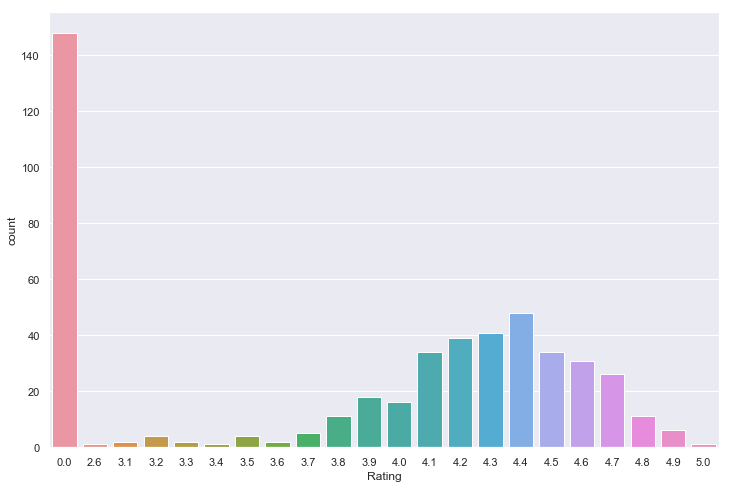

In [11]:
plt.figure(figsize=(12,8))
sns.countplot(x='Rating', data=df);

In [12]:
df['Type'] = df['Type'].str.replace('0', 'Free')

High quality Apps in category of Art And Design

In [72]:
perfectApps = df[(df['Category'] == 'ART_AND_DESIGN') & (df['Rating'] > 4.5) & (df['Type'] == 'Free')]
perfectApps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size in MB
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up,3.1
13,Mandala Coloring Book,ART_AND_DESIGN,4.6,4326,21M,"100,000+",Free,0,Everyone,Art & Design,"June 26, 2018",1.0.4,4.4 and up,21
16,Photo Designer - Write your name with shapes,ART_AND_DESIGN,4.7,3632,5.5M,"500,000+",Free,0,Everyone,Art & Design,"July 31, 2018",3.1,4.1 and up,5.5
19,ibis Paint X,ART_AND_DESIGN,4.6,224399,31M,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",5.5.4,4.1 and up,31


Display the Rating graph where App Category have "Art And Design", Rating is more then 4.5 and App is free

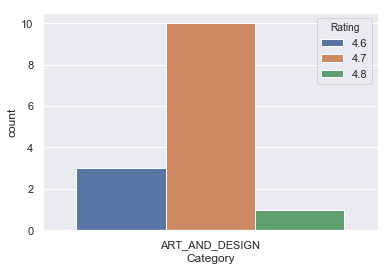

In [92]:
sns.countplot(x='Category', hue='Rating', data=perfectApps);

Plot the rating of each app and also showing the cateogories of apps

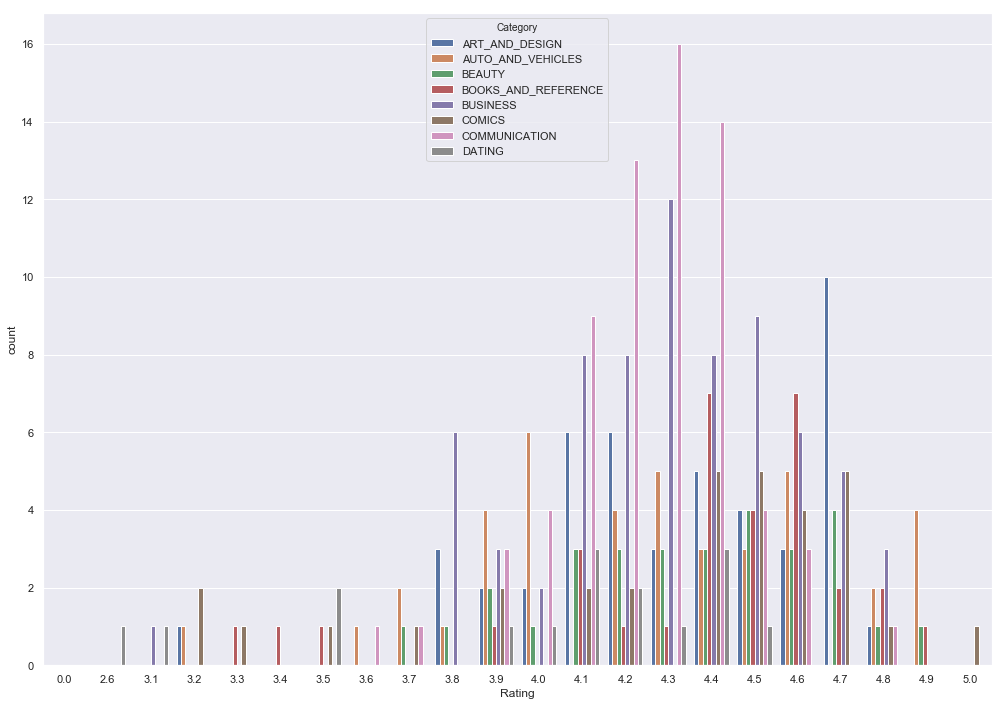

In [23]:
plt.figure(figsize=(17,12))
sns.countplot(x='Rating', hue='Category',  data=df);

Plot the Types of Apps Free or paid with categories

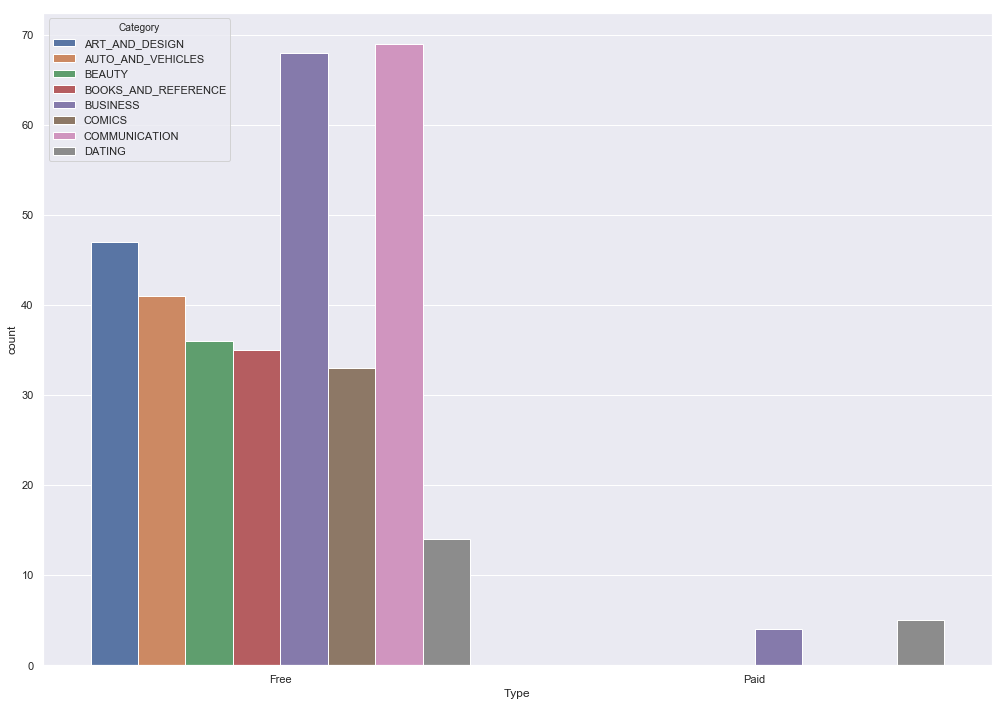

In [16]:
plt.figure(figsize=(17,12))
sns.countplot(x='Type', hue='Category',  data=df);

In [17]:
df['Category'].value_counts()

BUSINESS               72
COMMUNICATION          69
ART_AND_DESIGN         47
AUTO_AND_VEHICLES      41
BEAUTY                 36
BOOKS_AND_REFERENCE    35
COMICS                 33
DATING                 19
Name: Category, dtype: int64

In [18]:
df['Content Rating'].value_counts()

Everyone           287
0                  148
Teen                28
Mature 17+          28
Everyone 10+         8
Adults only 18+      1
Name: Content Rating, dtype: int64

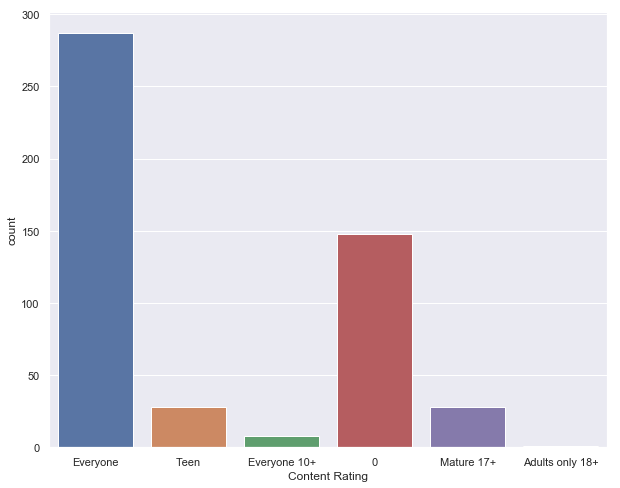

In [27]:
plt.figure(figsize=(10,8))
sns.countplot(x='Content Rating', data=df);

plot the types of apps and each type of app with age category, e.g for Teen, Adult, 18+ etc

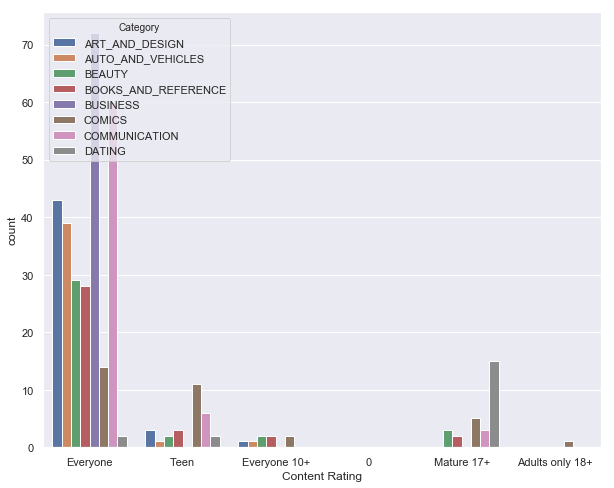

In [31]:
plt.figure(figsize=(10,8))
sns.countplot(x='Content Rating', hue='Category', data=df);

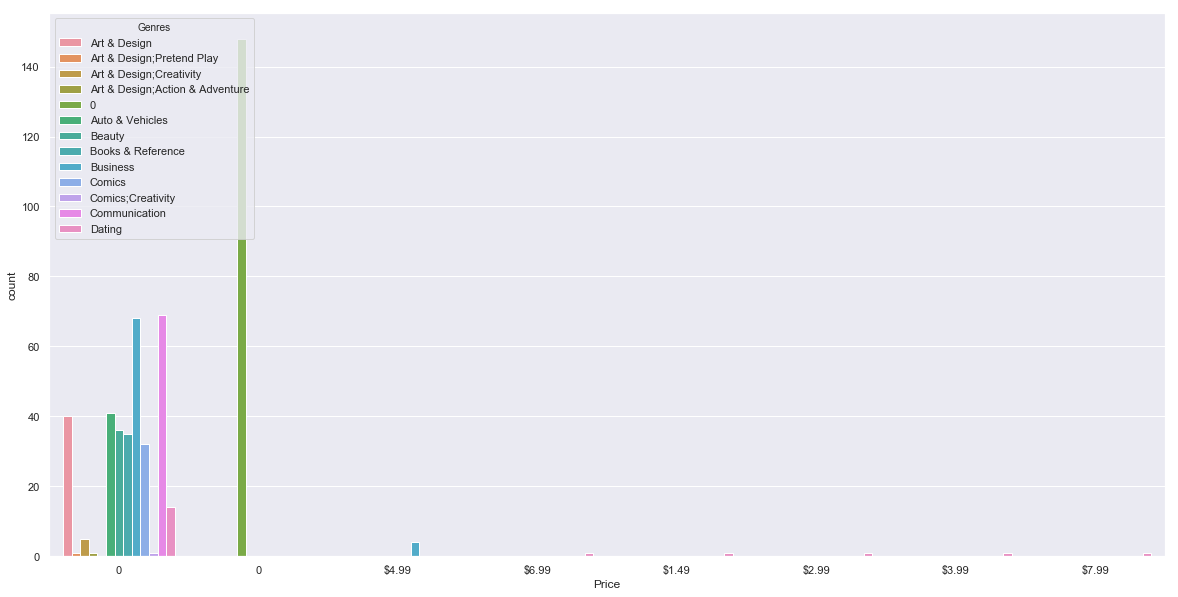

In [47]:
plt.figure(figsize=(20,10))
sns.countplot(x='Price', hue='Genres', data=df);

Plot the Categories of apps and also with types, Which apps are free and paid

/Users/abdul/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


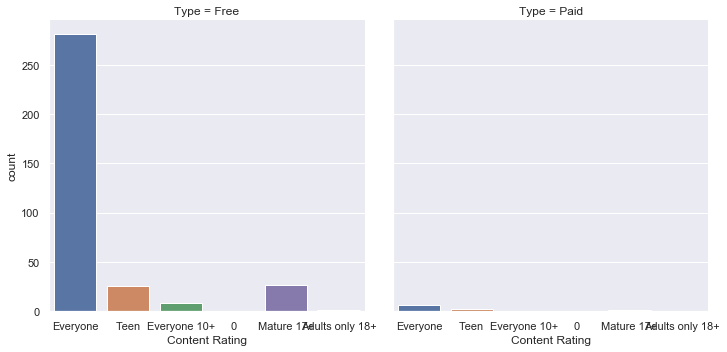

In [54]:
sns.factorplot(x='Content Rating', col='Type', data=df, kind='count');

Low Standard Apps in category of Businss

In [79]:
lowQualityApps = df[(df['Category'] == 'BUSINESS') & (df['Rating'] < 4.2) & (df['Type'] == 'Free')]
lowQualityApps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size in MB
195,USPS MOBILE®,BUSINESS,3.9,16589,9.1M,"1,000,000+",Free,0,Everyone,Business,"June 14, 2018",4.9.10,4.0.3 and up,9.1
199,Alba Heaven - Alvarez Job Portal Services,BUSINESS,4.0,8941,12M,"5,000,000+",Free,0,Everyone,Business,"July 31, 2018",4.6.30,4.0.3 and up,12
209,Plugin:AOT v5.0,BUSINESS,3.1,4034,23k,"100,000+",Free,0,Everyone,Business,"September 11, 2015",3.0.1.11 (Build 311),2.2 and up,0.023
210,Kariyer.net,BUSINESS,3.9,45964,16M,"1,000,000+",Free,0,Everyone,Business,"July 18, 2018",5.1.5,4.1 and up,16
212,Become a Job - Find a job or advertise,BUSINESS,4.1,6903,14M,"1,000,000+",Free,0,Everyone,Business,"July 10, 2018",2.3.6,4.1 and up,14
225,Secure Folder,BUSINESS,3.8,14760,8.6M,"50,000,000+",Free,0,Everyone,Business,"January 31, 2018",1.1.07.6,7.0 and up,8.6
241,FreshBooks Classic,BUSINESS,4.1,1802,26M,"100,000+",Free,0,Everyone,Business,"April 18, 2018",1.7.14,4.2 and up,26
242,Insightly CRM,BUSINESS,3.8,1383,51M,"100,000+",Free,0,Everyone,Business,"July 12, 2018",3.24.1,5.0 and up,51
244,HipChat - Chat Built for Teams,BUSINESS,3.8,5868,20M,"500,000+",Free,0,Everyone,Business,"July 3, 2018",3.19.005,4.1 and up,20
246,"MailChimp - Email, Marketing Automation",BUSINESS,4.1,5448,12M,"500,000+",Free,0,Everyone,Business,"July 25, 2018",4.9.1,5.0 and up,12


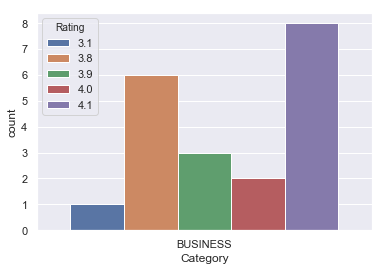

In [83]:
sns.countplot(x='Category', hue='Rating', data=lowQualityApps);

In [95]:
paidApps = df[df['Type'] == 'Paid']

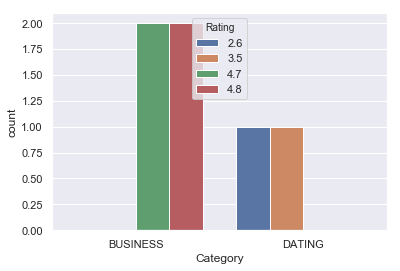

In [96]:
sns.countplot(x='Category', hue='Rating', data=paidApps);

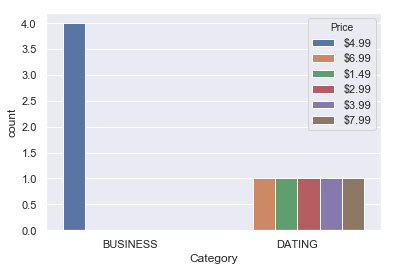

In [104]:
sns.countplot(x='Category', hue='Price', data=paidApps);

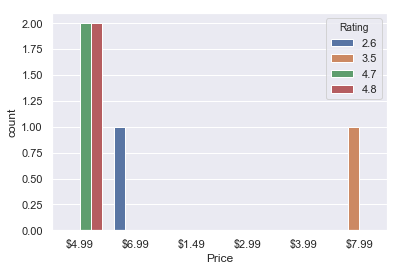

In [106]:
sns.countplot(x='Price', hue='Rating', data=paidApps);